In [3]:
%pip install matplotlib
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


factor_values: [np.float64(674.3315580482521), np.float64(684.3187649230234), np.float64(693.4296196776774), np.float64(701.8055877076475), np.float64(709.556423851791), np.float64(716.7689945540506), np.float64(723.513230528066), np.float64(729.8462618389722)]
accumulated_factor_values: [674.33155805 684.31876492 693.42961968 701.80558771 709.55642385
 716.76899455 723.51323053 729.84626184]
geo_means: [25.96789476 26.15948709 26.33305185 26.49161354 26.63750033 26.7725418
 26.89820125 27.01566697]
bottoms: [1. 1. 1. 1. 1. 1. 1. 1.]
factor_values: [np.float64(2856.449249930607), np.float64(285644.92499306094), np.float64(903288.5650460295), np.float64(2856449.2499306123), np.float64(9032885.650460303), np.float64(28564492.499306146), np.float64(90328856.50460313), np.float64(285644924.99306184)]
accumulated_factor_values: [1.92619387e+06 1.95472182e+08 6.26367046e+08 2.00467204e+09
 6.40934204e+09 2.04741426e+10 6.53541228e+10 2.08476881e+11]
geo_means: [   36040.16253587   365739.363

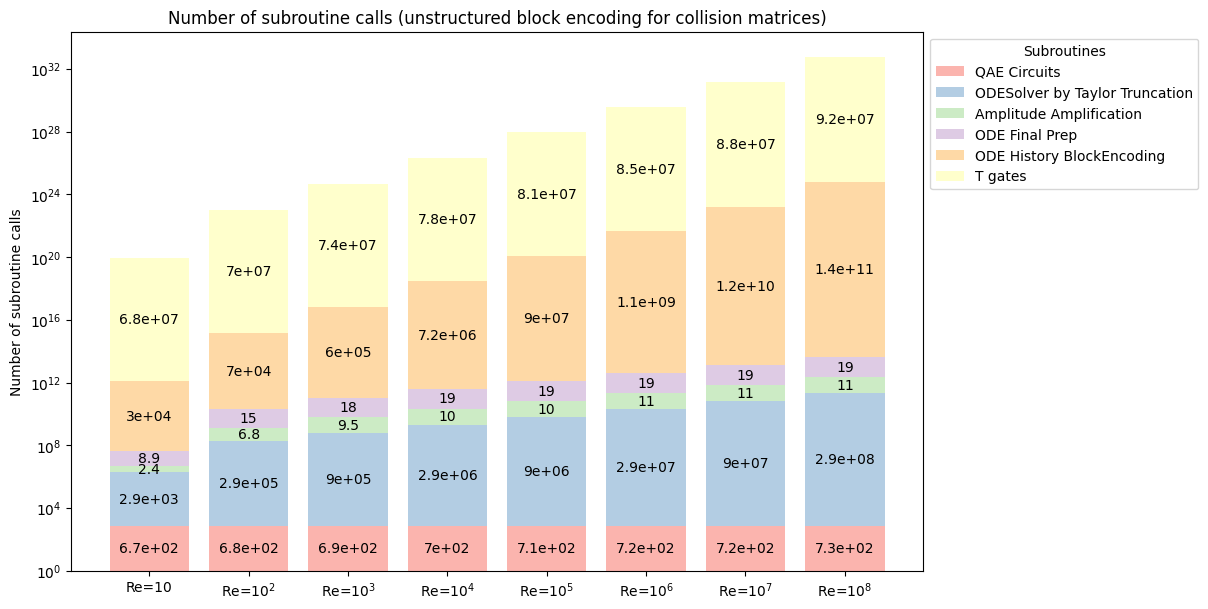

factor_values: [np.float64(674.3315580482521), np.float64(684.3187649230234), np.float64(693.4296196776774), np.float64(701.8055877076475), np.float64(709.556423851791), np.float64(716.7689945540506), np.float64(723.513230528066), np.float64(723.513230528066)]
accumulated_factor_values: [674.33155805 684.31876492 693.42961968 701.80558771 709.55642385
 716.76899455 723.51323053 723.51323053]
geo_means: [25.96789476 26.15948709 26.33305185 26.49161354 26.63750033 26.7725418
 26.89820125 26.89820125]
bottoms: [1. 1. 1. 1. 1. 1. 1. 1.]
factor_values: [np.float64(2856.449249930607), np.float64(285644.92499306094), np.float64(903288.5650460295), np.float64(2856449.2499306123), np.float64(9032885.650460303), np.float64(28564492.499306146), np.float64(90328856.50460313), np.float64(90328856.50460313)]
accumulated_factor_values: [1.92619387e+06 1.95472182e+08 6.26367046e+08 2.00467204e+09
 6.40934204e+09 2.04741426e+10 6.53541228e+10 6.53541228e+10]
geo_means: [  36040.16253587  365739.3639644

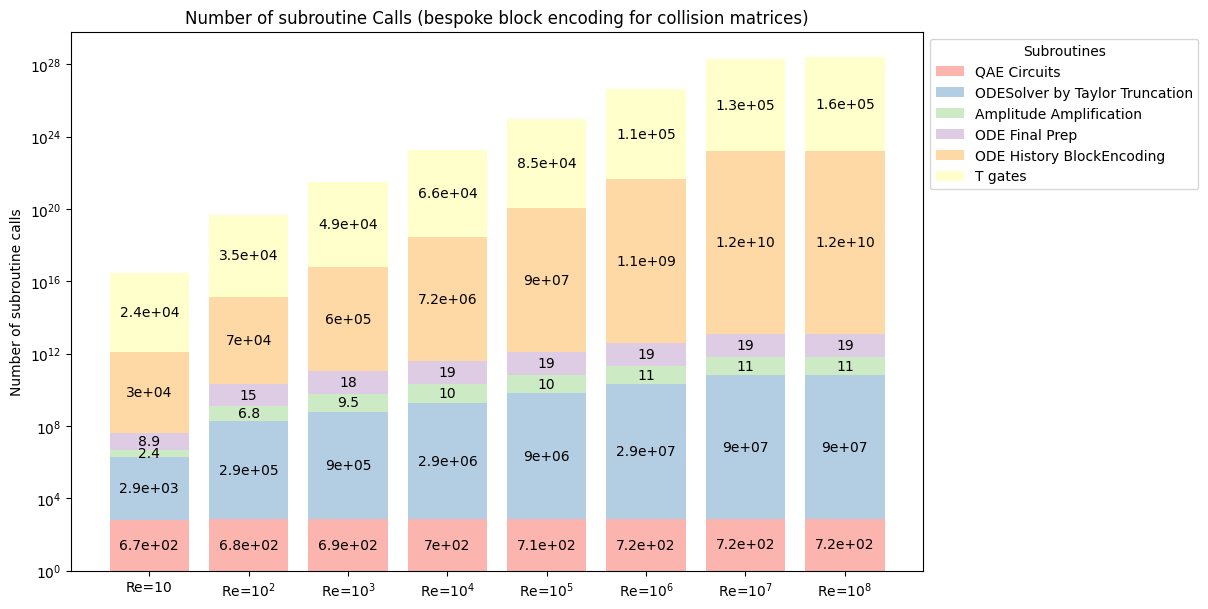

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def create_stacked_bar_plot(instance_breakdowns, plot_title=None, file_name=None):
    # Stacking the bars
    num_instances = len(instance_breakdowns)
    indices = np.arange(num_instances)

    # Create the plot
    fig, ax = plt.subplots(figsize=(11,7))


    # Bottoms for the stacked bars
    bottoms = np.ones(num_instances)
    accumulated_factor_values = np.ones(num_instances)

    # Choose a color palette
    # color_palette = plt.cm.tab10
    # color_palette = plt.cm.tab20
    # color_palette = plt.cm.Set2
    color_palette = plt.cm.Pastel1
    # color_palette = plt.cm.Accent

    # Convert nested dictionary to dataframe
    df = pd.DataFrame.from_dict(instance_breakdowns, orient="index")

    for i, column in enumerate(df.columns):
        color = color_palette(i)
        factor_name = column
        factor_values = list(df[column].values)
        accumulated_factor_values = factor_values * accumulated_factor_values
        ax.bar(
            indices,
            accumulated_factor_values,
            label=factor_name,
            bottom=bottoms,
            color=color,
        )
        # To place text in the middle of the bar for log plot, calculate the geometric mean of the top and bottom of the bar
        geometric_means = np.sqrt(bottoms * accumulated_factor_values)

        print(f"factor_values: {factor_values}")
        print(f"accumulated_factor_values: {accumulated_factor_values}")
        print(f"geo_means: {geometric_means}")
        print(f"bottoms: {bottoms}")
        for j, geometric_mean in enumerate(geometric_means):
            factor_value = factor_values[j]
            ax.text(
                j,
                geometric_mean,
                "{:.2g}".format(factor_value),
                ha="center",
                va="center",
            )
        bottoms = accumulated_factor_values

    ax.set_yscale("log")  # Set y-axis scale to logarithmic
    ax.set_ylim(bottom=1)  # Set lower y-axis value to 1
    ax.set_ylabel("Number of subroutine calls")
    ax.set_title(plot_title)
    ax.set_xticks(indices)
    ax.set_xticklabels(instance_breakdowns.keys())
    # ax.legend(title="Factors")
    ax.legend(title="Subroutines", loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig(file_name, dpi=300, bbox_inches="tight")
    plt.show()



instance_breakdowns_for_unstructured = {
    "Re=10":{
        "QAE Circuits":  674.3315580482521,
        "ODESolver by Taylor Truncation": 2856.449249930607,
        "Amplitude Amplification": 2.3816595733412678,
        "ODE Final Prep": 8.902034283330348,
        "ODE History BlockEncoding":30279.158073759758,
        "T gates":  66052734.352013126 + 45924.40340264395+ 1589947.606876946

    },
        "Re=$10^2$":{
        "QAE Circuits":  684.3187649230234,
        "ODESolver by Taylor Truncation": 285644.92499306094,
        "Amplitude Amplification":6.823047269952342,
        "ODE Final Prep":15.06741013953912,
        "ODE History BlockEncoding": 69907.05749238162,
        "T gates":  68622421.70324197 + 58665.853518642565 +1685267.879144681

    },
    "Re=$10^3$":
        {
        "QAE Circuits":  693.4296196776774,
        "ODESolver by Taylor Truncation": 903288.5650460295,
        "Amplitude Amplification":9.454071079553833,
        "ODE Final Prep": 17.736129520565434,
        "ODE History BlockEncoding": 603168.8912381945,
        "T gates":  71997165.01239958 + 74333.20421453564+ 1810405.0387431108
        },    
    "Re=$10^4$":
        {
            "QAE Circuits":  701.8055877076475,
            "ODESolver by Taylor Truncation":2856449.2499306123,
            "Amplitude Amplification":10.490857701080504,
            "ODE Final Prep": 18.683357249955368,
            "ODE History BlockEncoding": 7203001.879167468,
            "T gates":  75511912.84291922 +  92478.46830676754 + 1940727.550984579
        },
    "Re=$10^5$":
        {
            "QAE Circuits":  709.556423851791,
            "ODESolver by Taylor Truncation":9032885.650460303,
            "Amplitude Amplification":10.499241011059983,
            "ODE Final Prep": 18.690820753015046,
            "ODE History BlockEncoding":  89549354.07691042,
            "T gates":  78940948.50315014 + 112949.60013478584 + 2067875.5384005392
        }
,
    "Re=$10^6$":
        {
            "QAE Circuits":  716.7689945540506,
            "ODESolver by Taylor Truncation": 28564492.499306146,
            "Amplitude Amplification":10.513358019303462,
            "ODE Final Prep": 18.7033821293863,
            "ODE History BlockEncoding":1084169653.210079,
            "T gates":  82334668.57522526 +  135780.54748315155 + 2193715.541069988
        }
,
    "Re=$10^7$":
        {
            "QAE Circuits":  723.513230528066,
            "ODESolver by Taylor Truncation": 90328856.50460313,
            "Amplitude Amplification":10.514285699121231,
            "ODE Final Prep": 18.704207287597438,
            "ODE History BlockEncoding":12462951927.216286,
            "T gates":  85656187.50461037 +  160946.46376890715 + 2316881.42734351
        }
,
    "Re=$10^8$":
        {
            "QAE Circuits":  729.8462618389722,
            "ODESolver by Taylor Truncation": 285644924.99306184,
            "Amplitude Amplification":10.514303879121801,
            "ODE Final Prep": 18.70422345808975,
            "ODE History BlockEncoding":144952308914.81262,
            "T gates":  88993478.55625537 +  188506.62238470966 +  2440624.2070340654
        }
}

instance_breakdowns_for_structured = {
        "Re=10":{
        "QAE Circuits":  674.3315580482521,
        "ODESolver by Taylor Truncation": 2856.449249930607,
        "Amplitude Amplification": 2.3816595733412678,
        "ODE Final Prep": 8.902034283330348,
        "ODE History BlockEncoding":30279.158073759758,
        "T gates":  1949.241694944857 + 21065.107442358367 +841.8781605657102

    },
        "Re=$10^2$":{
        "QAE Circuits":  684.3187649230234,
        "ODESolver by Taylor Truncation": 285644.92499306094,
        "Amplitude Amplification":6.823047269952342,
        "ODE Final Prep":15.06741013953912,
        "ODE History BlockEncoding": 69907.05749238162,
        "T gates":  2324.9136765436274 + 32113.43843328633 +1017.5501421644809

    },
    "Re=$10^3$":
        {
        "QAE Circuits":  693.4296196776774,
        "ODESolver by Taylor Truncation": 903288.5650460295,
        "Amplitude Amplification":9.454071079553833,
        "ODE Final Prep": 17.736129520565434,
        "ODE History BlockEncoding": 603168.8912381945,
        "T gates":  45557.15930897707 + 1198.1326783302302+ 2705.496212709377
        },    
    "Re=$10^4$":
        {
            "QAE Circuits":  701.8055877076475,
            "ODESolver by Taylor Truncation":2856449.2499306123,
            "Amplitude Amplification":10.490857701080504,
            "ODE Final Prep": 18.683357249955368,
            "ODE History BlockEncoding": 7203001.879167468,
            "T gates":  3086.932726583136+ 61386.53428496906 + 1379.5691922039898
        },
    "Re=$10^5$":
        {
            "QAE Circuits":  709.556423851791,
            "ODESolver by Taylor Truncation":9032885.650460303,
            "Amplitude Amplification":10.499241011059983,
            "ODE Final Prep": 18.690820753015046,
            "ODE History BlockEncoding":  89549354.07691042,
            "T gates":  3467.846426750455 + 79598.25906186763 + 1560.4828923713087
        }
,
    "Re=$10^6$":
        {
            "QAE Circuits":  716.7689945540506,
            "ODESolver by Taylor Truncation": 28564492.499306146,
            "Amplitude Amplification":10.513358019303462,
            "ODE Final Prep": 18.7033821293863,
            "ODE History BlockEncoding":1084169653.210079,
            "T gates":   3848.5447144101145+  100193.07140254985 + 1741.1811800309677
        }
,
    "Re=$10^7$":
        {
            "QAE Circuits":  723.513230528066,
            "ODESolver by Taylor Truncation": 90328856.50460313,
            "Amplitude Amplification":10.514285699121231,
            "ODE Final Prep": 18.704207287597438,
            "ODE History BlockEncoding":12462951927.216286,
            "T gates":  4228.802600818797+  123170.43133403172 + 1921.4390664396506
        }
,
    "Re=$10^8$":
        {
            "QAE Circuits":  723.513230528066,
            "ODESolver by Taylor Truncation": 90328856.50460313,
            "Amplitude Amplification":10.514285699121231,
            "ODE Final Prep": 18.704207287597438,
            "ODE History BlockEncoding":12462951927.216286,
            "T gates":   4589.156813547808 +  148531.6270024844 +2093.7932791686617

       }
}


create_stacked_bar_plot(instance_breakdowns_for_unstructured, 
                        plot_title="Number of subroutine calls (unstructured block encoding for collision matrices)",
                        file_name="unstructured_stacked_barplot")
create_stacked_bar_plot(instance_breakdowns_for_structured, 
                        plot_title="Number of subroutine Calls (bespoke block encoding for collision matrices)",
                        file_name="structured_stacked_barplot"
                        )
